In [3]:
!pip install sodapy

In [38]:
# Why sodapy? (Socrata)
# Below is the part of the 'download.py' file where the Socrata module from sodapy is used. 
# Running the 'download.py' will create a dataset with a chosen size (The "data_100000.csv" dataset is a subset of the
# original one. the original dataset is about 1.76 millions rows)

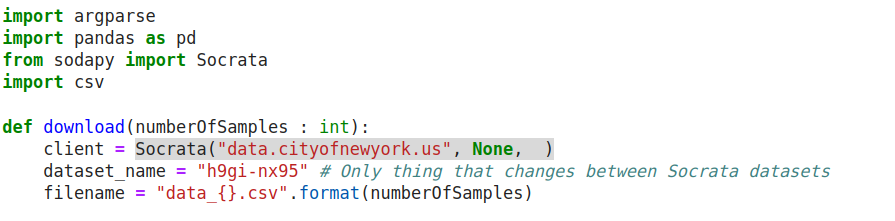

In [35]:
from IPython import display 
display.Image("./Screenshot from 2021-03-09 10-03-11.png", width=650)

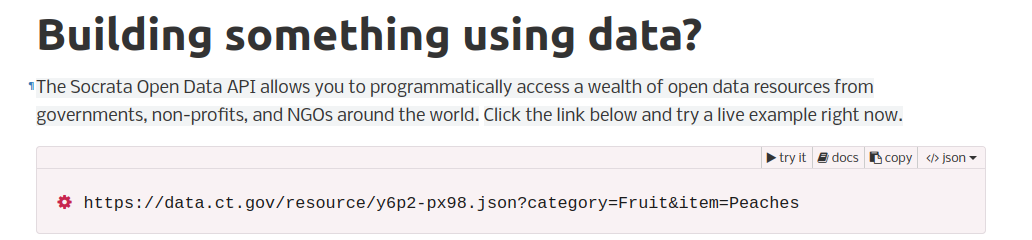

In [37]:
display.Image("./Screenshot from 2021-03-09 10-06-37.png", width=760)

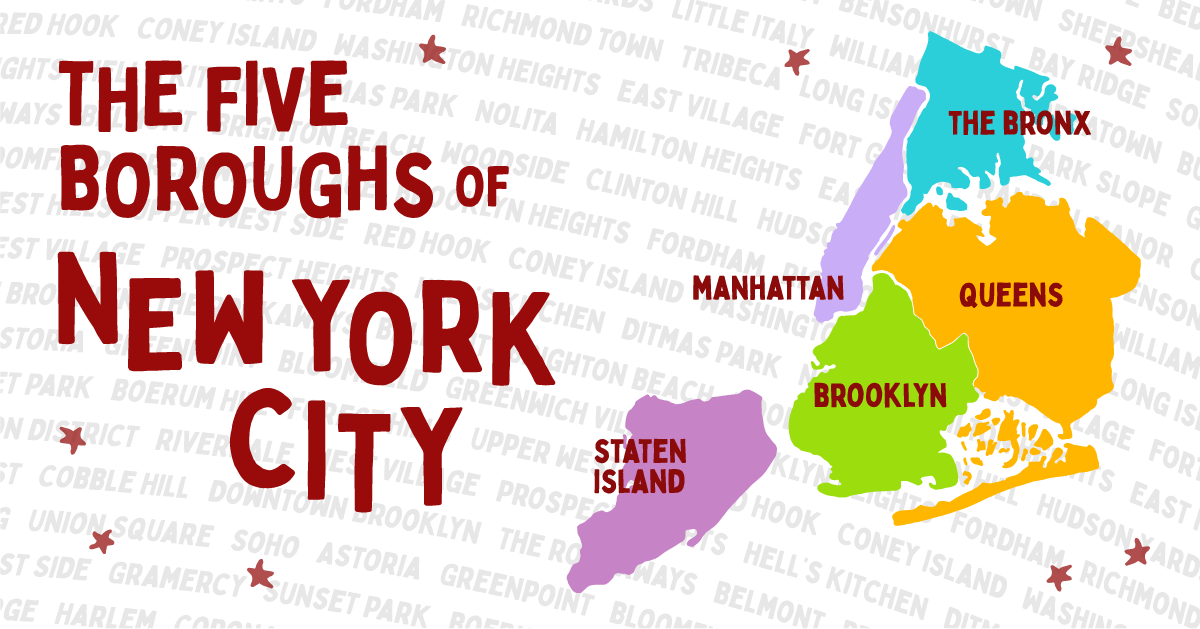

In [101]:
display.Image("./boroughs_NYC.png", width=700)

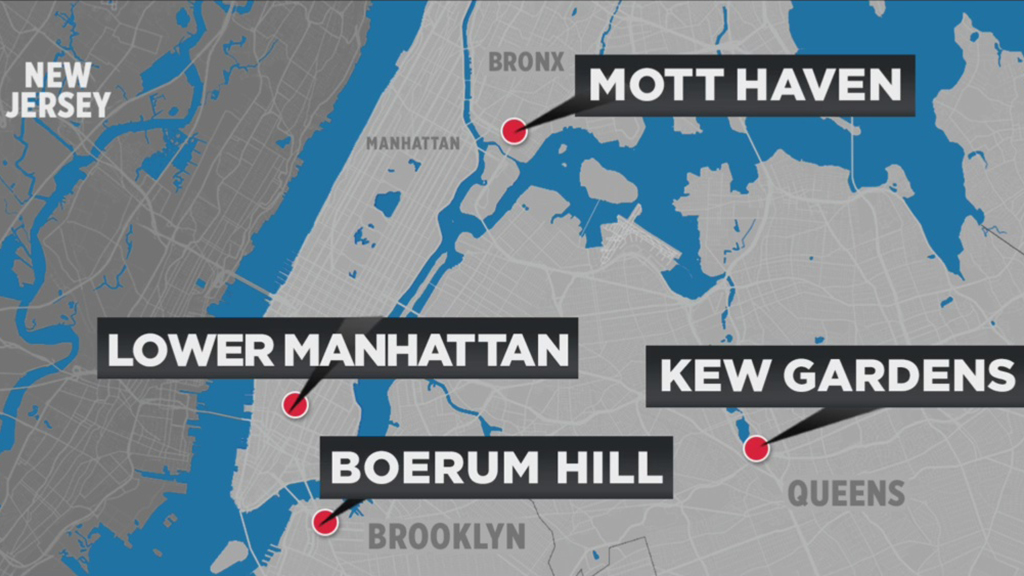

In [103]:
display.Image("./streets.jpg", width=650)

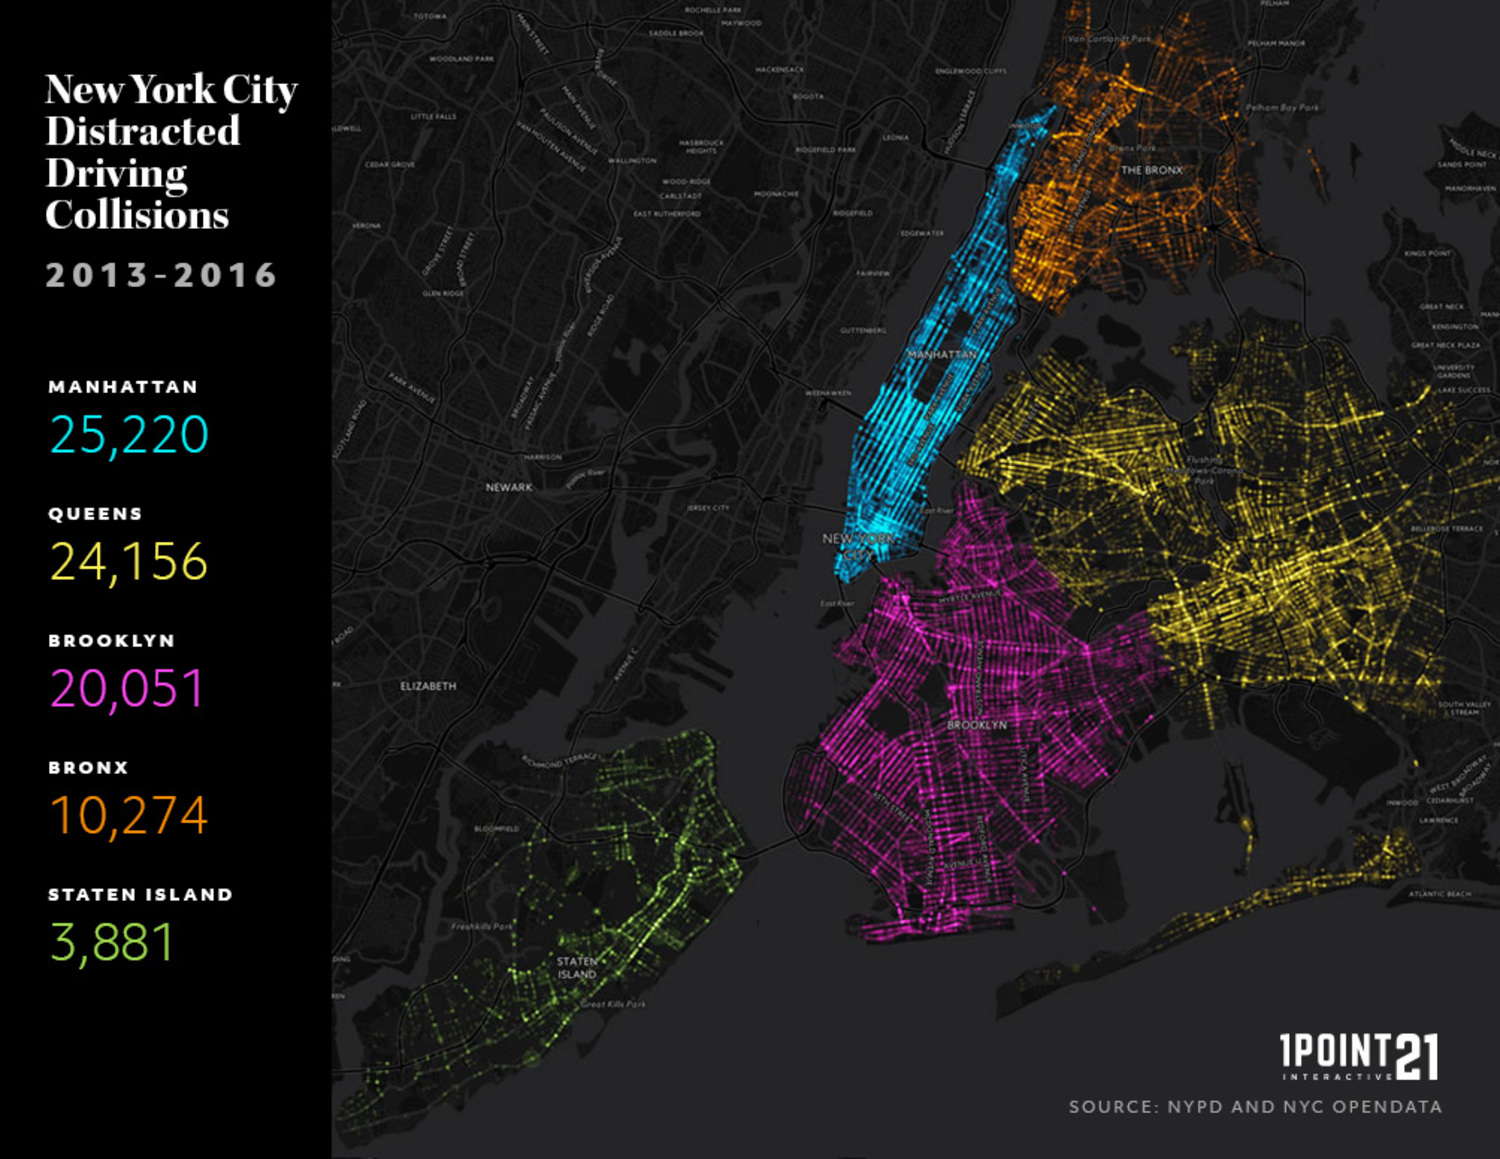

In [104]:
display.Image("./distracted_collisions.jpg", width=650)

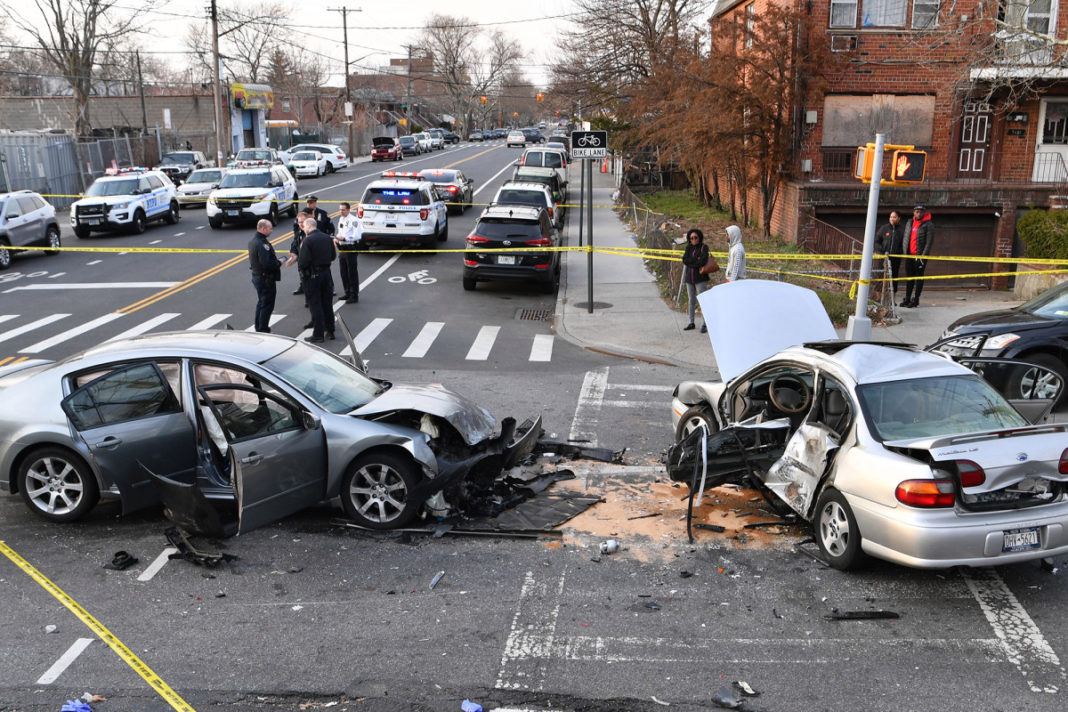

In [110]:
display.Image("./car-accident.jpg", width=550)

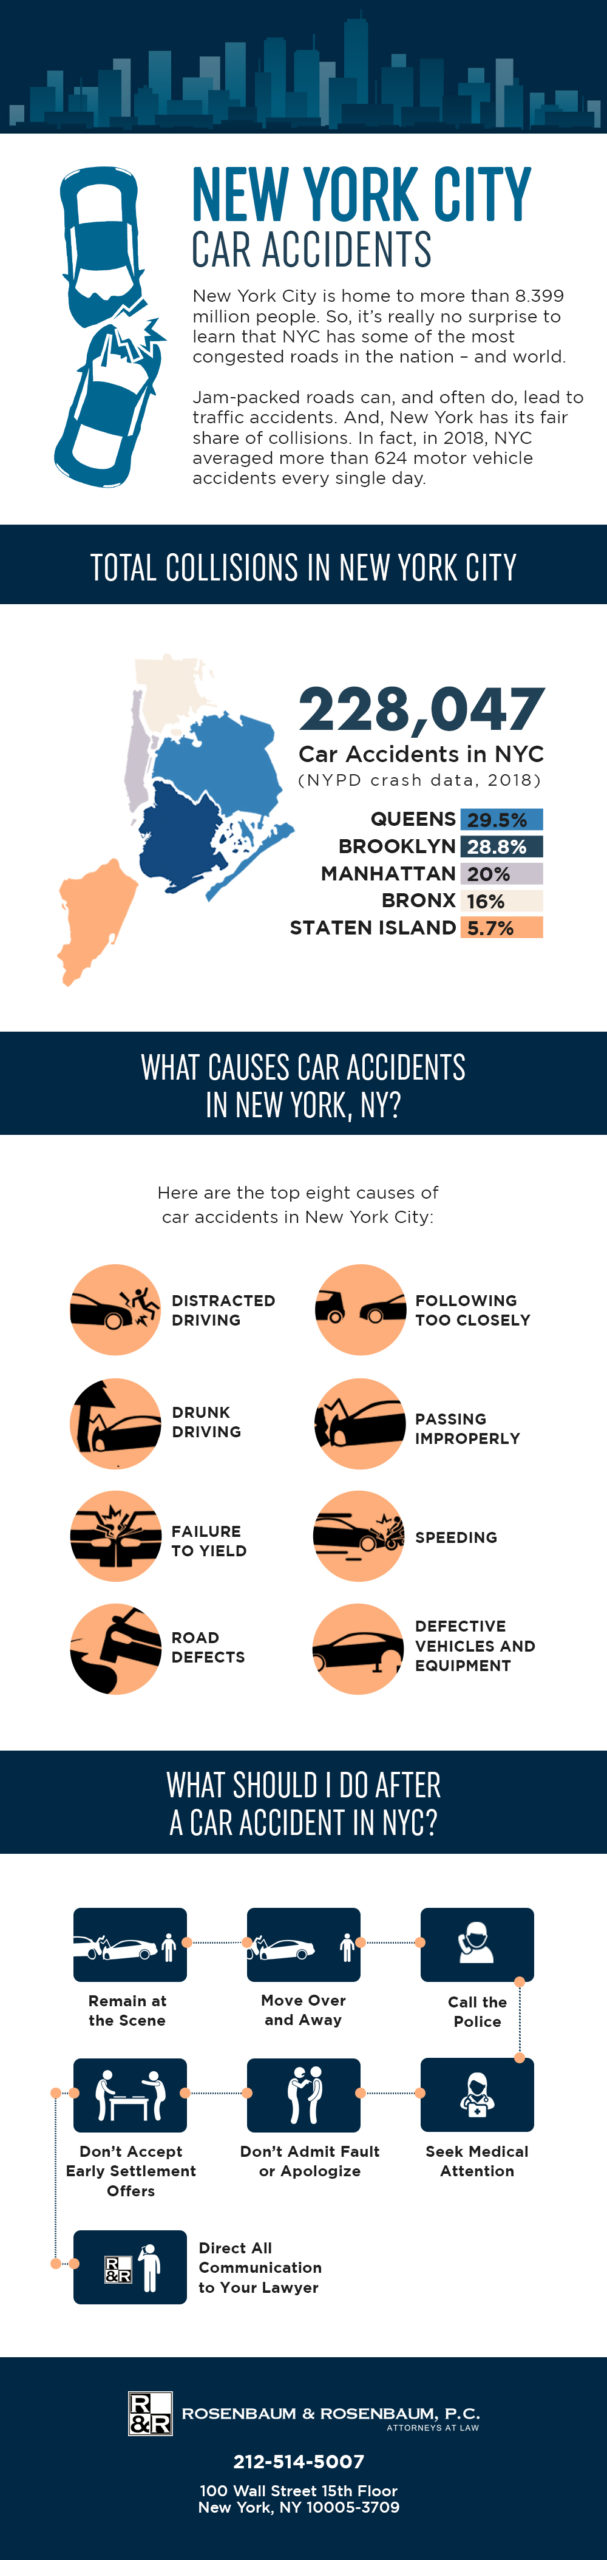

In [114]:
display.Image("./stats.jpg", width=460)

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [66]:
# Create a dataset of size 1000000
#%run '/home/ms/BeCode/ANT-Theano-2-27/additional_resources/datasets/NYC Motor Vehicle Crashes/download.py'

## The dataset used is the "data_100000.csv"

In [2]:
# Create a pandas DataFrame from a csv file containing a subset (100000 rows) of the NYC Motor Collisions dataset
df = pd.read_csv('data_100000.csv')

In [3]:
df.shape

(100000, 29)

In [4]:
# Check for NaN values
df.isna().sum()

crash_date                           0
crash_time                           0
borough                          34959
zip_code                         34964
latitude                          7875
longitude                         7875
location                          7875
on_street_name                   26831
off_street_name                  53917
cross_street_name                73175
number_of_persons_injured            1
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      474
contributing_factor_vehicle_2    23442
contributing_factor_vehicle_3    89725
contributing_factor_vehicle_4    97150
contributing_factor_vehicle_5    99136
collision_id                         0
vehicle_type_code1                1036
vehicle_type_code2       

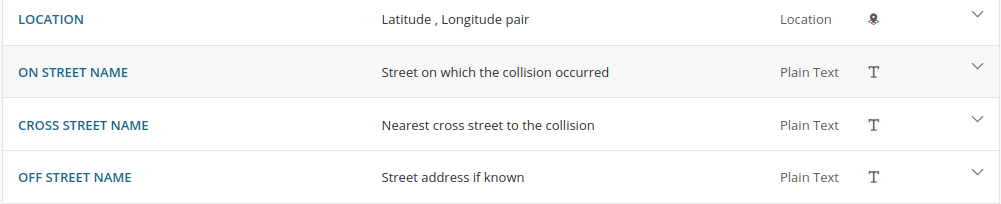

In [41]:
display.Image("./address.png", width=750)

In [5]:
# Check for duplicates
df.duplicated().any()

False

In [6]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-03-05T00:00:00.000,23:30,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE INNER ROADWA,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4396854,Sedan,Sedan,NaN,NaN,NaN
1,2021-03-04T00:00:00.000,16:15,MANHATTAN,10026.0,NaN,NaN,NaN,NaN,NaN,235 W 115 Street,...,NaN,NaN,NaN,NaN,4396406,Sedan,NaN,NaN,NaN,NaN
2,2021-03-03T00:00:00.000,0:00,MANHATTAN,10035.0,NaN,NaN,NaN,NaN,NaN,1 RANDALLS ISLAND,...,NaN,NaN,NaN,NaN,4396219,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2021-03-03T00:00:00.000,16:30,NaN,NaN,NaN,NaN,NaN,MEEKER AVENUE,VANDERVORT AVENUE,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4396071,Sedan,Box Truck,NaN,NaN,NaN
4,2021-03-02T00:00:00.000,23:40,BRONX,10451.0,NaN,NaN,NaN,EAST 138 STREET,MAJOR DEEGAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4395866,Sedan,NaN,NaN,NaN,NaN


In [7]:
# Drop unnecessary columns
df.drop(['vehicle_type_code_5','vehicle_type_code_4','vehicle_type_code_3',
         'contributing_factor_vehicle_5','contributing_factor_vehicle_4',
         'contributing_factor_vehicle_3'],axis =1, inplace= True)

In [8]:
df.borough.value_counts()

BROOKLYN         22905
QUEENS           17919
BRONX            12936
MANHATTAN         8942
STATEN ISLAND     2339
Name: borough, dtype: int64

In [9]:
# Drop rows that has NaN values in column "location"
df.dropna(axis=0, subset=['location'], inplace=True)

In [10]:
df.shape

(92125, 23)

In [11]:
df.tail()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
99995,2020-03-02T00:00:00.000,8:20,BROOKLYN,11229.0,40.606796,-73.94861,"(40.606796, -73.94861)",NaN,NaN,2424 AVENUE R,...,0,0,0,0,0,Following Too Closely,Following Too Closely,4296168,Sedan,Sedan
99996,2020-03-03T00:00:00.000,14:00,STATEN ISLAND,10305.0,40.585804,-74.08756,"(40.585804, -74.08756)",MASON AVENUE,CROMWELL AVENUE,NaN,...,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,4296852,Station Wagon/Sport Utility Vehicle,Sedan
99997,2020-03-02T00:00:00.000,11:00,BROOKLYN,11211.0,40.702408,-73.95802,"(40.702408, -73.95802)",NaN,NaN,121 PENN STREET,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4296478,Sedan,Sedan
99998,2020-03-02T00:00:00.000,13:09,BRONX,10473.0,40.823826,-73.86163,"(40.823826, -73.86163)",LELAND AVENUE,STORY AVENUE,NaN,...,0,0,0,0,0,View Obstructed/Limited,Unspecified,4302974,Station Wagon/Sport Utility Vehicle,Sedan
99999,2020-03-03T00:00:00.000,6:30,QUEENS,11427.0,40.726006,-73.75173,"(40.726006, -73.75173)",HILLSIDE AVENUE,214 STREET,NaN,...,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,4296693,Sedan,Sedan


In [12]:
# Clean date
df["crash_date"] = df["crash_date"].str.replace("T00:00:00.000", "")

<ipython-input-12-f633efe2b739>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["crash_date"] = df["crash_date"].str.replace("T00:00:00.000", "")


In [13]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
8,2021-02-27,18:38,NaN,NaN,40.687244,-73.954690,"(40.687244, -73.95469)",BEDFORD AVENUE,NaN,NaN,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan
12,2021-02-25,17:45,NaN,NaN,40.689194,-73.753650,"(40.689194, -73.75365)",120 AVENUE,196 STREET,NaN,...,0,0,0,0,0,Unspecified,NaN,4394767,NaN,NaN
13,2021-02-25,20:30,BROOKLYN,11207.0,40.660286,-73.890840,"(40.660286, -73.89084)",HEGEMAN AVENUE,NEW JERSEY AVENUE,NaN,...,0,0,0,0,0,Unspecified,NaN,4394685,Taxi,NaN
22,2021-02-21,13:05,NaN,NaN,40.768642,-73.949036,"(40.768642, -73.949036)",FDR DRIVE,NaN,NaN,...,0,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan
23,2021-02-21,16:25,QUEENS,11363.0,40.762290,-73.757110,"(40.76229, -73.75711)",NORTHERN BOULEVARD,CROSS ISLAND PARKWAY,NaN,...,0,0,0,0,0,Driver Inexperience,NaN,4393450,Sedan,NaN


In [14]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2021-02-27,18:38,NaN,NaN,40.687244,-73.954690,"(40.687244, -73.95469)",BEDFORD AVENUE,NaN,NaN,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan
1,2021-02-25,17:45,NaN,NaN,40.689194,-73.753650,"(40.689194, -73.75365)",120 AVENUE,196 STREET,NaN,...,0,0,0,0,0,Unspecified,NaN,4394767,NaN,NaN
2,2021-02-25,20:30,BROOKLYN,11207.0,40.660286,-73.890840,"(40.660286, -73.89084)",HEGEMAN AVENUE,NEW JERSEY AVENUE,NaN,...,0,0,0,0,0,Unspecified,NaN,4394685,Taxi,NaN
3,2021-02-21,13:05,NaN,NaN,40.768642,-73.949036,"(40.768642, -73.949036)",FDR DRIVE,NaN,NaN,...,0,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan
4,2021-02-21,16:25,QUEENS,11363.0,40.762290,-73.757110,"(40.76229, -73.75711)",NORTHERN BOULEVARD,CROSS ISLAND PARKWAY,NaN,...,0,0,0,0,0,Driver Inexperience,NaN,4393450,Sedan,NaN


In [17]:
#df['borough'].fillna('Unspecified', inplace=True)

In [16]:
# Create 3 news columns: 'year', 'month', 'day' from the 'crash_date' column
df['year'] = df.crash_date.astype(str).apply(lambda x: x[:4])
df['month'] = df.crash_date.astype(str).apply(lambda x: x[5:7])
df['day'] = df.crash_date.astype(str).apply(lambda x: x[8:10])

In [32]:
df.head()

,crash_date,year,month,day,crash_time,borough,zip_code,latitude,longitude,location,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,address
0,2021-02-27,2021,02,27,18:38,BROOKLYN,11216.0,40.687244,-73.954690,"(40.687244, -73.95469)",...,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan,BEDFORD AVE & LEXINGTON AVE
1,2021-02-25,2021,02,25,17:45,QUEENS,11412.0,40.689194,-73.753650,"(40.689194, -73.75365)",...,0,0,0,0,Unspecified,NaN,4394767,NaN,NaN,120TH AVE & 196TH ST
2,2021-02-25,2021,02,25,20:30,BROOKLYN,11207.0,40.660286,-73.890840,"(40.660286, -73.89084)",...,0,0,0,0,Unspecified,NaN,4394685,Taxi,NaN,NaN
3,2021-02-21,2021,02,21,13:05,MANHATTAN,10075.0,40.768642,-73.949036,"(40.768642, -73.949036)",...,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan,E 77TH ST & CHEROKEE PL
4,2021-02-21,2021,02,21,16:25,QUEENS,11363.0,40.762290,-73.757110,"(40.76229, -73.75711)",...,0,0,0,0,Driver Inexperience,NaN,4393450,Sedan,NaN,NaN


In [18]:
# Change position of the columns
df.insert(1, 'year', df.pop("year"))
df.insert(2, 'month', df.pop("month"))
df.insert(3, 'day', df.pop("day"))

In [19]:
df.head()

,crash_date,year,month,day,crash_time,borough,zip_code,latitude,longitude,location,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2021-02-27,2021,02,27,18:38,NaN,NaN,40.687244,-73.954690,"(40.687244, -73.95469)",...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan
1,2021-02-25,2021,02,25,17:45,NaN,NaN,40.689194,-73.753650,"(40.689194, -73.75365)",...,0,0,0,0,0,Unspecified,NaN,4394767,NaN,NaN
2,2021-02-25,2021,02,25,20:30,BROOKLYN,11207.0,40.660286,-73.890840,"(40.660286, -73.89084)",...,0,0,0,0,0,Unspecified,NaN,4394685,Taxi,NaN
3,2021-02-21,2021,02,21,13:05,NaN,NaN,40.768642,-73.949036,"(40.768642, -73.949036)",...,0,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan
4,2021-02-21,2021,02,21,16:25,QUEENS,11363.0,40.762290,-73.757110,"(40.76229, -73.75711)",...,0,0,0,0,0,Driver Inexperience,NaN,4393450,Sedan,NaN


In [20]:
df.isnull().sum()

crash_date                           0
year                                 0
month                                0
day                                  0
crash_time                           0
borough                          28961
zip_code                         28966
latitude                             0
longitude                            0
location                             0
on_street_name                   26031
off_street_name                  49598
cross_street_name                66094
number_of_persons_injured            1
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      450
contributing_factor_vehicle_2    21601
collision_id                         0
vehicle_type_code1                 988
vehicle_type_code2       

In [21]:
# Create a new column 'address'
df['address'] = np.nan

In [22]:
df['address']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
92120   NaN
92121   NaN
92122   NaN
92123   NaN
92124   NaN
Name: address, Length: 92125, dtype: float64

In [21]:
df = pd.read_csv('good_dataset.csv')

In [ ]:
# Fill in the missing zip code and borough. Every zip code and borough are verified and if a value is missing,
# a request is made via the library "requests" to an API (Geocode ArcGIS API).

# The coordinates are taken from the column 'location' and send to the API to get the address, the zip code
# and the borough.

# a new column "address" is created to be used later on.

pd.options.mode.chained_assignment = None

import requests

import time
start = time.time() # Check how long the process takes

for index in range(len(df_cleaned)):
    if (pd.isnull(df_cleaned.at[index,'borough']) == True) or (pd.isnull(df_cleaned.at[index,'zip_code']) == True):
        
        latitude = df_cleaned.latitude[index]
        longitude = df_cleaned.longitude[index]
        request = requests.get(f"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/reverseGeocode?f=pjson&featureTypes=StreetInt&location={longitude},{latitude}")
        request = request.json()
        
        try:
            address = request['address']['ShortLabel']
            borough = request['address']['District']
            zip_code = request['address']['Postal']
        
            df_cleaned['address'][index] = address.upper()
            df_cleaned['borough'][index] = borough.upper()
            df_cleaned['zip_code'][index] = zip_code
        
        except Exception:
            pass
        
end = time.time()
print(end - start)

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,crash_date,year,month,day,crash_time,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2,address
0,0,0,0,2021-02-27,2021,2,27,18:38,BROOKLYN,11216.0,...,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan,BEDFORD AVE & LEXINGTON AVE
1,1,1,1,2021-02-25,2021,2,25,17:45,QUEENS,11412.0,...,0,0,0,0,Unspecified,NaN,4394767,NaN,NaN,120TH AVE & 196TH ST
2,2,2,2,2021-02-25,2021,2,25,20:30,BROOKLYN,11207.0,...,0,0,0,0,Unspecified,NaN,4394685,Taxi,NaN,NaN
3,3,3,3,2021-02-21,2021,2,21,13:05,MANHATTAN,10075.0,...,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan,E 77TH ST & CHEROKEE PL
4,4,4,4,2021-02-21,2021,2,21,16:25,QUEENS,11363.0,...,0,0,0,0,Driver Inexperience,NaN,4393450,Sedan,NaN,NaN


In [23]:
# Delete unnecessary columns
del df['Unnamed: 0']
del df['Unnamed: 0.1']
del df['Unnamed: 0.1.1']

In [24]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [25]:
# Consolildating 'on_street_name', 'off_street_name', 'cross_street_name' and 'address' columns.
# For every missing values in the 'address' column, a lookup up is done in the other columns containing addresses.
# If there is an address available, this address is copied to the address column at the given index.
pd.options.mode.chained_assignment = None

for index in range(len(df)):
    
    if pd.isnull(df.at[index,'address']) == True:
        if pd.isnull(df.at[index,'on_street_name']) == False:
            # Copy value to address column
            df.address.iloc[index] = df.on_street_name.iloc[index]
            
        
        elif pd.isnull(df.at[index,'off_street_name']) == False:
            # Copy value to address column
            df.address.iloc[index] = df.off_street_name.iloc[index]
        
        elif pd.isnull(df.at[index,'cross_street_name']) == False:
            # Copy value to address column
            df.address.iloc[index] = df.cross_street_name.iloc[index]

        else:
            df.drop(index, axis=0, inplace=True)
            # Drop row

In [26]:
# Delete columns that are not needed anymore
del df['on_street_name']
del df['off_street_name']
del df['cross_street_name']
del df['latitude']
del df['longitude']

In [27]:
df.shape

(92125, 24)

In [28]:
df.loc[1]

crash_date                                   2021-02-25
year                                               2021
month                                                 2
day                                                  25
crash_time                                        17:45
borough                                          QUEENS
zip_code                                        11412.0
latitude                                      40.689194
longitude                                     -73.75365
location                         (40.689194, -73.75365)
number_of_persons_injured                           1.0
number_of_persons_killed                              0
number_of_pedestrians_injured                         1
number_of_pedestrians_killed                          0
number_of_cyclist_injured                             0
number_of_cyclist_killed                              0
number_of_motorist_injured                            0
number_of_motorist_killed                       

In [29]:
df.dtypes

crash_date                        object
year                               int64
month                              int64
day                                int64
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
location                          object
number_of_persons_injured        float64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
collision_id                       int64
vehicle_type_code1                object
vehicle_type_code2                object
address                           object
dtype: object

In [30]:
df.number_of_persons_injured.unique()

array([ 0.,  1.,  2.,  4.,  3., 16.,  5.,  6., 10., nan,  7.,  8., 11.,
        9., 15.])

In [31]:
# Drop of NaN value from column 'number_of_persons_injured'
df.dropna(axis=0, subset=['number_of_persons_injured'], inplace=True)

In [32]:
# Set int type to all values of the column
df.number_of_persons_injured = df.number_of_persons_injured.astype(int)

In [33]:
df.dtypes

crash_date                        object
year                               int64
month                              int64
day                                int64
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
location                          object
number_of_persons_injured          int64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
collision_id                       int64
vehicle_type_code1                object
vehicle_type_code2                object
address                           object
dtype: object

In [34]:
# Replace NaN value by "Unspecified"
df['contributing_factor_vehicle_1'].fillna('Unspecified', inplace=True)
df['contributing_factor_vehicle_2'].fillna('Unspecified', inplace=True)
df['vehicle_type_code1'].fillna('Unspecified', inplace=True)
df['vehicle_type_code2'].fillna('Unspecified', inplace=True)
df['number_of_persons_injured'].fillna('Unspecified', inplace=True)

In [35]:
df.isnull().sum()

crash_date                        0
year                              0
month                             0
day                               0
crash_time                        0
borough                          78
zip_code                         70
latitude                          0
longitude                         0
location                          0
number_of_persons_injured         0
number_of_persons_killed          0
number_of_pedestrians_injured     0
number_of_pedestrians_killed      0
number_of_cyclist_injured         0
number_of_cyclist_killed          0
number_of_motorist_injured        0
number_of_motorist_killed         0
contributing_factor_vehicle_1     0
contributing_factor_vehicle_2     0
collision_id                      0
vehicle_type_code1                0
vehicle_type_code2                0
address                           0
dtype: int64

In [38]:
# Drop the remaining NaN values in 'borough' and 'zip_code' columns
df.dropna(axis=0, subset=['zip_code'], inplace=True)
df.dropna(axis=0, subset=['borough'], inplace=True)

In [39]:
# Set int type to all values of the column
df.zip_code = df.zip_code.astype(int)

In [40]:
# Reposition address column in the dataset
df.insert(8, 'address', df.pop("address"))

In [41]:
df.head()

,crash_date,year,month,day,crash_time,borough,zip_code,location,address,number_of_persons_injured,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2021-02-27,2021,2,27,18:38,BROOKLYN,11216,"(40.687244, -73.95469)",BEDFORD AVE & LEXINGTON AVE,0,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4396940,Sedan,Sedan
1,2021-02-25,2021,2,25,17:45,QUEENS,11412,"(40.689194, -73.75365)",120TH AVE & 196TH ST,1,...,0,0,0,0,0,Unspecified,Unspecified,4394767,Unspecified,Unspecified
2,2021-02-25,2021,2,25,20:30,BROOKLYN,11207,"(40.660286, -73.89084)",HEGEMAN AVENUE,0,...,0,0,0,0,0,Unspecified,Unspecified,4394685,Taxi,Unspecified
3,2021-02-21,2021,2,21,13:05,MANHATTAN,10075,"(40.768642, -73.949036)",E 77TH ST & CHEROKEE PL,0,...,0,0,0,0,0,Other Vehicular,Unspecified,4393743,4 dr sedan,Sedan
4,2021-02-21,2021,2,21,16:25,QUEENS,11363,"(40.76229, -73.75711)",NORTHERN BOULEVARD,0,...,0,0,0,0,0,Driver Inexperience,Unspecified,4393450,Sedan,Unspecified


In [45]:
df.isnull().sum()

crash_date                       0
year                             0
month                            0
day                              0
crash_time                       0
borough                          0
zip_code                         0
location                         0
address                          0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
contributing_factor_vehicle_1    0
contributing_factor_vehicle_2    0
collision_id                     0
vehicle_type_code1               0
vehicle_type_code2               0
dtype: int64

In [44]:
# Save dataFrame to external csv file "Final_dataset.csv)
df.to_csv('Final_dataset.csv')

In [46]:
df.shape

(92046, 22)